In [ ]:
import pandas as pd
import numpy as np
import plotly.express as px
from scipy.stats import zscore
from dtaidistance.subsequence.dtw import subsequence_search
from dtaidistance.subsequence.dtw import subsequence_alignment
from dtaidistance import dtw_visualisation as dtwvis
from dtaidistance import dtw

In [ ]:
import matplotlib.pyplot as plt

Primeiramente compilar o código em C para a demonstração

In [ ]:
!g++ /content/UCR_USP_suite.cpp -o ucr.run

Com o codigo compilado, podemos fazer a demonstração<br>
O comando para rodar o UCR é o seguinte:<br>
ucr.run data_name query_name size_query window<br>
i.e ucr.run data.txt query 125 0.1<br>

A saida do UCR é a seguinte:<br>

Location : 250 -> Localização onde se inicia a query<br>
Distance : 1.11626e-14 -> Distancia entre a query e a subsequencia encontrada<br>
Data Scanned : 5000 -> Numero total de dados escaneados<br>
Total Execution Time : 0.038867 sec -> tempo que levou para executar o algoritmo<br>
<br>
Pruned by LB_Kim    :  90.08% -> Representa a quantidade em porcentagem que foi realizada essa operação<br>
Pruned by LB_Keogh  :   0.00% -> Representa a quantidade em porcentagem que foi realizada essa operação<br>
Pruned by LB_Keogh2 :   0.00% -> Representa a quantidade em porcentagem que foi realizada essa operação<br>
DTW Calculation     :   9.92% -> Representa a quantidade em porcentagem que foi realizada essa operação<br>


In [ ]:
data = np.loadtxt('data.txt')

In [ ]:
query = data[0:500]
size_query = len(query)

In [ ]:
!./ucr.run data.txt query_1_len_500.txt $size_query 0.1

500
.
Location : 0
Distance : 0
Data Scanned : 5000
Total Execution Time : 0.004107 sec

Pruned by LB_Kim    :  90.00%
Pruned by LB_Keogh  :   0.00%
Pruned by LB_Keogh2 :   0.00%
DTW Calculation     :  10.00%


In [ ]:
query = data[250:500]
size_query = len(query)

In [ ]:
!./ucr.run data.txt query_2_len_250.txt $size_query 0.1

250
.
Location : 250
Distance : 1.11626e-14
Data Scanned : 5000
Total Execution Time : 0.038867 sec

Pruned by LB_Kim    :  90.08%
Pruned by LB_Keogh  :   0.00%
Pruned by LB_Keogh2 :   0.00%
DTW Calculation     :   9.92%


In [ ]:
query = data[3500:4000]
size_query = len(query)

In [ ]:
!./ucr.run data.txt query_3_len_500.txt $size_query 0.1

500
.
Location : 3500
Distance : 6.24144e-14
Data Scanned : 5000
Total Execution Time : 1.68719 sec

Pruned by LB_Kim    :  20.02%
Pruned by LB_Keogh  :   0.00%
Pruned by LB_Keogh2 :   0.00%
DTW Calculation     :  79.98%


In [ ]:
query = data[3510:3600]
size_query = len(query)

In [ ]:
!./ucr.run data.txt query_4_len_90.txt $size_query 0.1

90
.
Location : 3510
Distance : 1.76729e-14
Data Scanned : 5000
Total Execution Time : 0.021524 sec

Pruned by LB_Kim    :  38.10%
Pruned by LB_Keogh  :  26.72%
Pruned by LB_Keogh2 :   5.28%
DTW Calculation     :  29.90%


In [ ]:
query = data[2000:3000]
size_query = len(query)

In [ ]:
!./ucr.run data.txt query_5_len_1000.txt $size_query 0.1

1000
.
Location : 2000
Distance : 1.29359e-14
Data Scanned : 5000
Total Execution Time : 6.03781 sec

Pruned by LB_Kim    :  40.00%
Pruned by LB_Keogh  :   0.00%
Pruned by LB_Keogh2 :   0.00%
DTW Calculation     :  60.00%


In [ ]:
query = data[1736:2195]
size_query = len(query)

In [ ]:
!./ucr.run data.txt query_6_len_459.txt $size_query 0.1

459
.
Location : 1736
Distance : 2.10115e-14
Data Scanned : 5000
Total Execution Time : 1.04129 sec

Pruned by LB_Kim    :  56.16%
Pruned by LB_Keogh  :   0.00%
Pruned by LB_Keogh2 :   0.00%
DTW Calculation     :  43.84%


Buscando ECGs

Aqui carrego alguns dados que serão utilizados para pesquisar algumas querys

In [ ]:
ecg1 = np.loadtxt("/content/ecg1.txt")
ecg2 = np.loadtxt("/content/ecg2.txt")
ecg3 = np.loadtxt("/content/ecg3.txt")
ecg4 = np.loadtxt("/content/ecg4.txt")
ecg5 = np.loadtxt("/content/ecg5.txt")
ecg6 = np.loadtxt("/content/ecg6.txt")
ecg7 = np.loadtxt("/content/ecg7.txt")

buscando as query nos ecgs

Aqui carrego as querys que serão localizadas nos dados acimas

In [ ]:
query_names = [
                "/content/query_1_ecg_len_66",
                "/content/query_2_ecg_len_121",
                "/content/query_3_ecg_len_136",
                "/content/query_4_ecg_len_231",
                "/content/query_5_ecg_len_567"
              ]

In [ ]:
querys = []
for i in query_names:
  querys.append(np.loadtxt(i))

# Ecg1

In [ ]:
!./ucr.run ecg1.txt query_1_ecg_len_66 66 0.1

.
Location : 8411
Distance : 4.68049
Data Scanned : 10000
Total Execution Time : 0.019382 sec

Pruned by LB_Kim    :  18.66%
Pruned by LB_Keogh  :  71.69%
Pruned by LB_Keogh2 :   0.21%
DTW Calculation     :   9.44%


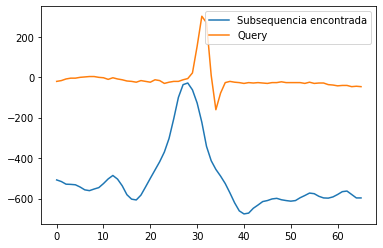

In [ ]:
idx = 8411
size_q = 66
plt.plot(ecg1[idx:idx+size_q])
plt.plot(querys[0])
plt.legend(["Subsequencia encontrada", "Query"])

In [ ]:
!./ucr.run ecg1.txt query_2_ecg_len_121 121 0.1

.
Location : 8059
Distance : 1.94077
Data Scanned : 10000
Total Execution Time : 0.024396 sec

Pruned by LB_Kim    :  57.35%
Pruned by LB_Keogh  :  29.68%
Pruned by LB_Keogh2 :   7.04%
DTW Calculation     :   5.93%


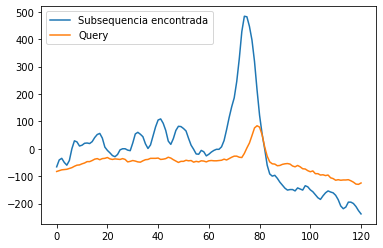

In [ ]:
idx = 8059
size_q = 121
plt.plot(ecg1[idx:idx+size_q])
plt.plot(querys[1])
plt.legend(["Subsequencia encontrada", "Query"])

In [ ]:
!./ucr.run ecg1.txt query_3_ecg_len_136 136 0.1

.
Location : 7551
Distance : 3.30028
Data Scanned : 10000
Total Execution Time : 0.040018 sec

Pruned by LB_Kim    :  38.93%
Pruned by LB_Keogh  :  51.38%
Pruned by LB_Keogh2 :   2.27%
DTW Calculation     :   7.42%


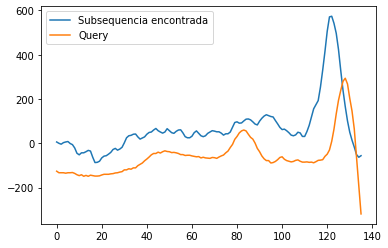

In [ ]:
idx = 7551
size_q = 136
plt.plot(ecg1[idx:idx+size_q])
plt.plot(querys[2])
plt.legend(["Subsequencia encontrada", "Query"])

In [ ]:
!./ucr.run ecg1.txt query_4_ecg_len_231 231 0.1

.
Location : 3096
Distance : 5.35609
Data Scanned : 10000
Total Execution Time : 0.07157 sec

Pruned by LB_Kim    :  10.39%
Pruned by LB_Keogh  :  78.74%
Pruned by LB_Keogh2 :   2.63%
DTW Calculation     :   8.24%


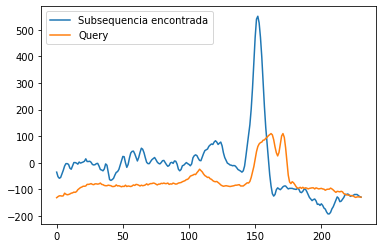

In [ ]:
idx = 3096
size_q = 231
plt.plot(ecg1[idx:idx+size_q])
plt.plot(querys[3])
plt.legend(["Subsequencia encontrada", "Query"])

In [ ]:
!./ucr.run ecg1.txt query_5_ecg_len_567 567 0.1

.
Location : 6059
Distance : 3.61881
Data Scanned : 10000
Total Execution Time : 0.482885 sec

Pruned by LB_Kim    :  23.72%
Pruned by LB_Keogh  :  27.23%
Pruned by LB_Keogh2 :  26.62%
DTW Calculation     :  22.43%


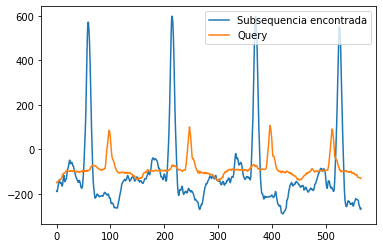

In [ ]:
idx = 6059
size_q = 567
plt.plot(ecg1[idx:idx+size_q])
plt.plot(querys[4])
plt.legend(["Subsequencia encontrada", "Query"])

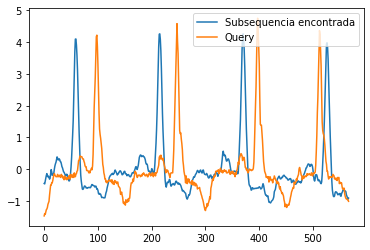

In [ ]:
idx = 6059
size_q = 567
plt.plot(zscore(ecg1[idx:idx+size_q]))
plt.plot(zscore(querys[4]))
plt.legend(["Subsequencia encontrada", "Query"])

# Ecg2

In [ ]:
!./ucr.run ecg2.txt query_1_ecg_len_66 66 0.1

.
Location : 927
Distance : 2.93672
Data Scanned : 3200
Total Execution Time : 0.012423 sec

Pruned by LB_Kim    :  11.75%
Pruned by LB_Keogh  :  72.28%
Pruned by LB_Keogh2 :   0.00%
DTW Calculation     :  15.97%


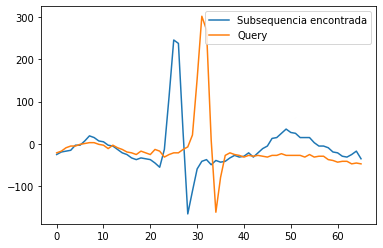

In [ ]:
idx = 927
size_q = 66
plt.plot(ecg2[idx:idx+size_q])
plt.plot(querys[0])
plt.legend(["Subsequencia encontrada", "Query"])

In [ ]:
!./ucr.run ecg2.txt query_2_ecg_len_121 121 0.1

.
Location : 2961
Distance : 8.59445
Data Scanned : 3200
Total Execution Time : 0.035949 sec

Pruned by LB_Kim    :   2.00%
Pruned by LB_Keogh  :  55.84%
Pruned by LB_Keogh2 :   0.00%
DTW Calculation     :  42.16%


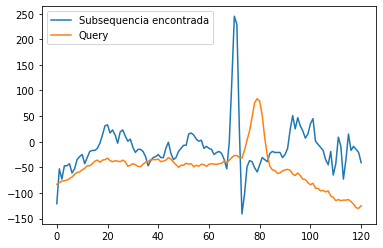

In [ ]:
idx = 2961
size_q = 121
plt.plot(ecg2[idx:idx+size_q])
plt.plot(querys[1])
plt.legend(["Subsequencia encontrada", "Query"])

In [ ]:
!./ucr.run ecg2.txt query_3_ecg_len_136 136 0.1

.
Location : 2305
Distance : 9.08423
Data Scanned : 3200
Total Execution Time : 0.064776 sec

Pruned by LB_Kim    :   1.31%
Pruned by LB_Keogh  :  57.09%
Pruned by LB_Keogh2 :   0.00%
DTW Calculation     :  41.59%


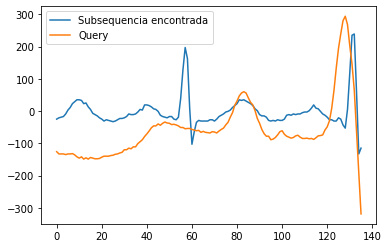

In [ ]:
idx = 2305
size_q = 136
plt.plot(ecg2[idx:idx+size_q])
plt.plot(querys[2])
plt.legend(["Subsequencia encontrada", "Query"])

In [ ]:
!./ucr.run ecg2.txt query_4_ecg_len_231 231 0.1

.
Location : 854
Distance : 13.1465
Data Scanned : 3200
Total Execution Time : 0.368596 sec

Pruned by LB_Kim    :   0.00%
Pruned by LB_Keogh  :   0.59%
Pruned by LB_Keogh2 :   0.00%
DTW Calculation     :  99.41%


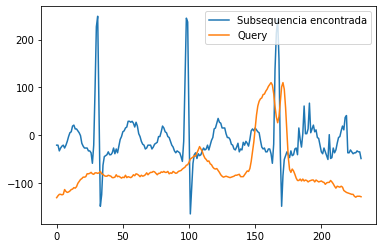

In [ ]:
idx = 854
size_q = 231
plt.plot(ecg2[idx:idx+size_q])
plt.plot(querys[3])
plt.legend(["Subsequencia encontrada", "Query"])

In [ ]:
!./ucr.run ecg2.txt query_5_ecg_len_567 567 0.1

.
Location : 169
Distance : 18.5343
Data Scanned : 3200
Total Execution Time : 2.70922 sec

Pruned by LB_Kim    :   0.00%
Pruned by LB_Keogh  :   0.00%
Pruned by LB_Keogh2 :   0.00%
DTW Calculation     : 100.00%


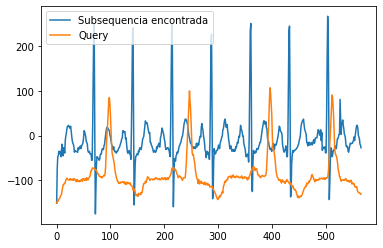

In [ ]:
idx = 169
size_q = 567
plt.plot(ecg2[idx:idx+size_q])
plt.plot(querys[4])
plt.legend(["Subsequencia encontrada", "Query"])

# Ecg3

In [ ]:
!./ucr.run ecg3.txt query_1_ecg_len_66 66 0.1

.
Location : 5331
Distance : 4.68517
Data Scanned : 8500
Total Execution Time : 0.018004 sec

Pruned by LB_Kim    :  19.89%
Pruned by LB_Keogh  :  68.55%
Pruned by LB_Keogh2 :   0.27%
DTW Calculation     :  11.28%


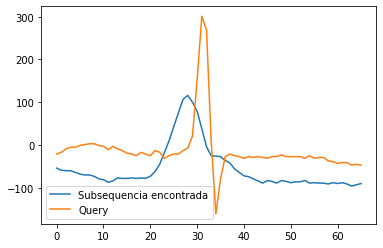

In [ ]:
idx = 5331
size_q = 66
plt.plot(ecg3[idx:idx+size_q])
plt.plot(querys[0])
plt.legend(["Subsequencia encontrada", "Query"])

In [ ]:
!./ucr.run ecg3.txt query_2_ecg_len_121 121 0.1

.
Location : 398
Distance : 2.99728
Data Scanned : 8500
Total Execution Time : 0.019262 sec

Pruned by LB_Kim    :  63.00%
Pruned by LB_Keogh  :  26.00%
Pruned by LB_Keogh2 :   5.08%
DTW Calculation     :   5.92%


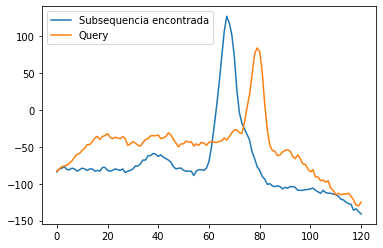

In [ ]:
idx = 398
size_q = 121
plt.plot(ecg3[idx:idx+size_q])
plt.plot(querys[1])
plt.legend(["Subsequencia encontrada", "Query"])

In [ ]:
!./ucr.run ecg3.txt query_3_ecg_len_136 136 0.1

.
Location : 6134
Distance : 3.79813
Data Scanned : 8500
Total Execution Time : 0.02959 sec

Pruned by LB_Kim    :  26.86%
Pruned by LB_Keogh  :  65.15%
Pruned by LB_Keogh2 :   1.11%
DTW Calculation     :   6.88%


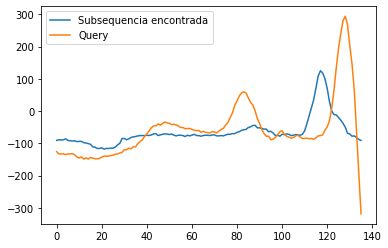

In [ ]:
idx = 6134
size_q = 136
plt.plot(ecg3[idx:idx+size_q])
plt.plot(querys[2])
plt.legend(["Subsequencia encontrada", "Query"])

In [ ]:
!./ucr.run ecg3.txt query_4_ecg_len_231 231 0.1

.
Location : 306
Distance : 5.80627
Data Scanned : 8500
Total Execution Time : 0.065621 sec

Pruned by LB_Kim    :   9.12%
Pruned by LB_Keogh  :  80.01%
Pruned by LB_Keogh2 :   1.35%
DTW Calculation     :   9.52%


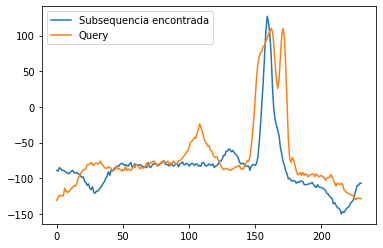

In [ ]:
idx = 306
size_q = 231
plt.plot(ecg3[idx:idx+size_q])
plt.plot(querys[3])
plt.legend(["Subsequencia encontrada", "Query"])

In [ ]:
!./ucr.run ecg3.txt query_5_ecg_len_567 567 0.1

.
Location : 521
Distance : 0
Data Scanned : 8500
Total Execution Time : 0.100887 sec

Pruned by LB_Kim    :  88.67%
Pruned by LB_Keogh  :   1.36%
Pruned by LB_Keogh2 :   0.96%
DTW Calculation     :   9.00%


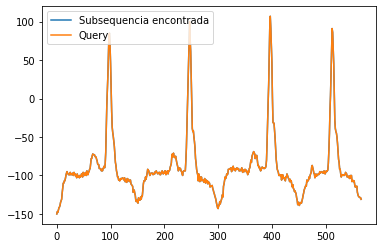

In [ ]:
idx = 521
size_q = 567
plt.plot(ecg3[idx:idx+size_q])
plt.plot(querys[4])
plt.legend(["Subsequencia encontrada", "Query"])

# Ecg4

In [ ]:
!./ucr.run ecg4.txt query_1_ecg_len_66 66 0.1

.
Location : 1504
Distance : 0
Data Scanned : 10000
Total Execution Time : 0.009295 sec

Pruned by LB_Kim    :  93.40%
Pruned by LB_Keogh  :   3.62%
Pruned by LB_Keogh2 :   0.00%
DTW Calculation     :   2.98%


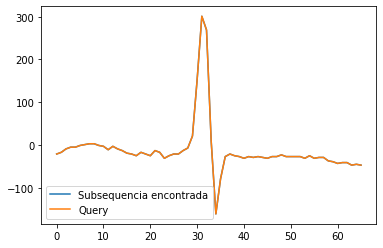

In [ ]:
idx = 1504
size_q = 66
plt.plot(ecg4[idx:idx+size_q])
plt.plot(querys[0])
plt.legend(["Subsequencia encontrada", "Query"])

In [ ]:
!./ucr.run ecg4.txt query_2_ecg_len_121 121 0.1

.
Location : 9028
Distance : 6.50467
Data Scanned : 10000
Total Execution Time : 0.126839 sec

Pruned by LB_Kim    :   4.09%
Pruned by LB_Keogh  :  69.79%
Pruned by LB_Keogh2 :   0.30%
DTW Calculation     :  25.82%


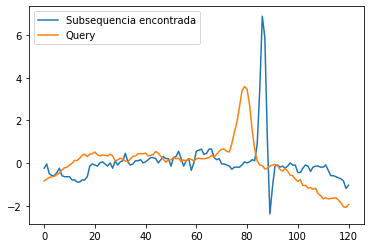

In [ ]:
idx = 9028
size_q = 121
plt.plot(zscore(ecg4[idx:idx+size_q]))
plt.plot(zscore(querys[1]))
plt.legend(["Subsequencia encontrada", "Query"])

In [ ]:
!./ucr.run ecg4.txt query_3_ecg_len_136 136 0.1

.
Location : 3735
Distance : 7.32336
Data Scanned : 10000
Total Execution Time : 0.095901 sec

Pruned by LB_Kim    :   2.87%
Pruned by LB_Keogh  :  77.93%
Pruned by LB_Keogh2 :   0.99%
DTW Calculation     :  18.21%


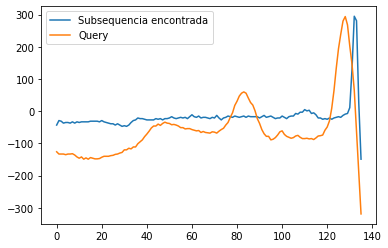

In [ ]:
idx = 3735
size_q = 136
plt.plot(ecg4[idx:idx+size_q])
plt.plot(querys[2])
plt.legend(["Subsequencia encontrada", "Query"])

In [ ]:
!./ucr.run ecg4.txt query_4_ecg_len_231 231 0.1

.
Location : 5270
Distance : 11.7958
Data Scanned : 10000
Total Execution Time : 0.559001 sec

Pruned by LB_Kim    :   0.04%
Pruned by LB_Keogh  :  50.73%
Pruned by LB_Keogh2 :   0.22%
DTW Calculation     :  49.01%


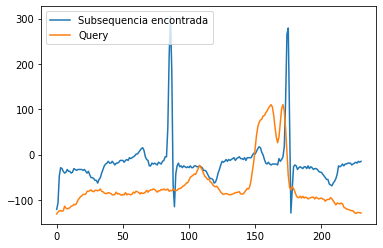

In [ ]:
idx = 5270
size_q = 231
plt.plot(ecg4[idx:idx+size_q])
plt.plot(querys[3])
plt.legend(["Subsequencia encontrada", "Query"])

In [ ]:
!./ucr.run ecg4.txt query_5_ecg_len_567 567 0.1

.
Location : 3733
Distance : 15.1361
Data Scanned : 10000
Total Execution Time : 6.49957 sec

Pruned by LB_Kim    :   0.01%
Pruned by LB_Keogh  :   0.02%
Pruned by LB_Keogh2 :   0.00%
DTW Calculation     :  99.97%


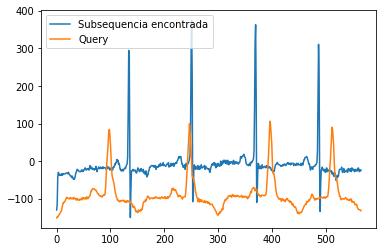

In [ ]:
idx = 3733
size_q = 567
plt.plot(ecg4[idx:idx+size_q])
plt.plot(querys[4])
plt.legend(["Subsequencia encontrada", "Query"])

#Demonstração do uso do DTW para a identificação de topo e base de LDW e Cabo

In [375]:
poco = pd.read_csv("poco")

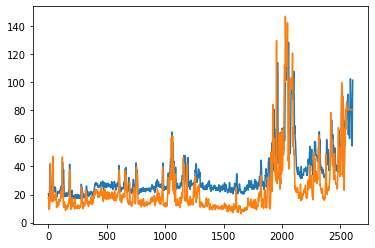

In [380]:
gr = poco['GR'].to_numpy()
lwd = poco['GRLWD'].to_numpy()
plt.plot(gr)
plt.plot(lwd)

Seleciono um pedaço do inicio do lwd para identificação do topo

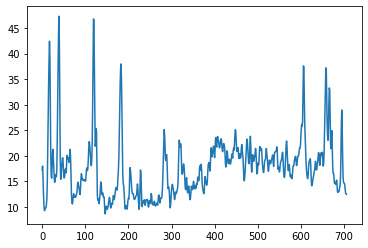

In [401]:
query = lwd[:707]
query_len = len(query)
plt.plot(query)

Salvo a query e o dado em txt para rodar no ucr

In [384]:
np.savetxt("query.txt", query)
np.savetxt("data.txt", gr)

Rodando o UCR para localizar o topo

In [392]:
!./ucr.run data.txt query.txt $query_len 0.1

.
Location : 2
Distance : 6.0411
Data Scanned : 2607
Total Execution Time : 0.034467 sec

Pruned by LB_Kim    :   6.90%
Pruned by LB_Keogh  :  37.48%
Pruned by LB_Keogh2 :  25.05%
DTW Calculation     :  30.57%


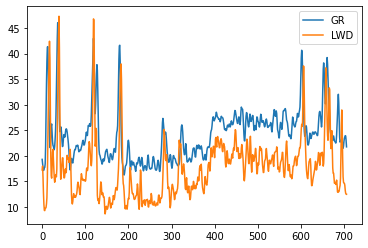

In [402]:
idx = 2
topo = idx
plt.plot(gr[idx:idx+query_len])
plt.plot(query)
plt.legend(["GR", "LWD"])

Rodando UCR para localizar a base

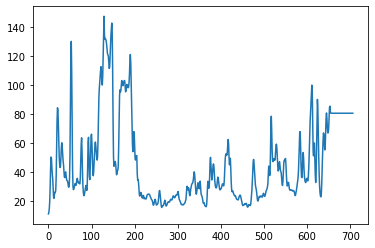

In [404]:
query = lwd[-707:]
query_len = len(query)
plt.plot(query)

In [396]:
np.savetxt("query.txt", query)
np.savetxt("data.txt", gr)

In [397]:
!./ucr.run data.txt query.txt $query_len 0.1

.
Location : 1870
Distance : 3.96267
Data Scanned : 2607
Total Execution Time : 0.372191 sec

Pruned by LB_Kim    :   0.35%
Pruned by LB_Keogh  :  42.77%
Pruned by LB_Keogh2 :   6.29%
DTW Calculation     :  50.59%


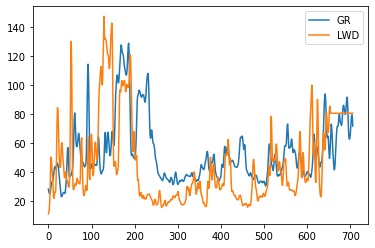

In [405]:
idx = 1870
base = idx+query_len
plt.plot(gr[idx:idx+query_len])
plt.plot(query)
plt.legend(["GR", "LWD"])